# 3.11 Model Selection, Underfitting and Overfitting

- ***Overfitting***
  - The phenomena of fitting our training distribution more closely than the real distribution
- ***Regularization***
  - the techniques used to combat overfitting

## 3.11.1 Training Error and Generalization Error
- Training error
  - The error exhibited by the model during its use of the training data set 
- Generalization error 
  - Any expected error when applying the model to an imaginary stream of additional (test) data drawn from the underlying data distribution. 
- Statistical Learning Theory
  - We want to find a model that reduces the generalization error.
- Model Complexity
  - <u>Simple models and abundant data</u>
    - the generalization error will be equal to be the training error. 
  - Complex models and fewer examples
    - The training error to go down but the generalization gap to grow.
- Factors to influence the generalizability of a model
  - ***The number of tunable parameters***
    - When the number of tunable parameters (the number of degrees of freedom) is large, models tend to be more   susceptible to overfitting.
  - ***The values taken by the parameters***
    - When weights can take a wider range of values, models can be more susceptible to overfitting.
  - ***The number of training examples***
    - It is trivially easy to overfit a dataset containing only one or two examples even if your model is simple.

## 3.11.2 Model Selection
- We select our model based on an evaluation of the performance of several candidate models. 
  - The candidate models can be similar models using different hyper-parameters
- E.g., MLP
  - the number of hidden layers 
  - the number of hidden units
  - the activation functions in each hidden layer.
- ***Validation Data Set***
  - A portion of data outside of the training and testing data sets to be used in model selection.
- In practice, there may be unclear boundaries between validation and testing data sets
  - In this book, the test data sets should be considered as validation sets, and the test accuracy is for validation accuracy. 
- K-Fold Cross-Validation

## 3.11.3 Underfitting and Overfitting
- Underfitting
  - It occurs when the model is unable to reduce training errors since the model is too simplistic.
- Overfitting
  - It occurs when the training errors is significantly less than that of the testing data set
- For the two problems, we focuse primarily on two factors: ***model complexity*** and ***training data set size***.
- Model Complexity
  - Given training data consisting of the scalar data feature $x$ and the corresponding scalar label $y$, we try to find a polynomial of degree $d$ to estimate $y$ <br/>$$\hat{y}= \sum_{i=0}^d x^i w_i$$
  where $w_i$ refers to the model's weight parameter and the bias is implicit in $w_0$ since $x^0 = 1$.
  - If the model is too simple for the dataset, we are likely to see underfitting, whereas if we pick an overly complex model we see overfitting.
  - Choosing an appropriately complex model for the data set is one way to avoid underfitting and overfitting
  ![](https://github.com/diveintodeeplearning/d2l-en/raw/master/img/capacity_vs_error.svg?sanitize=true)
- Data Set Size
  - if there are not enough samples in the training data set, especially if the number of samples is less than the number of model parameters (count by element), overfitting is more likely to occur.
  - Additionally, as we increase the amount of training data, the generalization error tpically decreases

## 3.11.4 Polynomial Regression

In [1]:
%matplotlib inline
import gluonbook as gb
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

- Generating Data Sets
  - Given $x$ we will use the following cubic polynomial to generate the labels on training and test data
  $$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0,0.1)$$

  - Factorials are implemented in Gluon using the Gamma function, where $n! = \Gamma(n+1)$.

In [18]:
maxdegree = 20                     # maximum degree of the polynomial
n_train, n_test = 100, 1000        # training and test data set sizes
true_w = nd.zeros(maxdegree)       # allocate lots of empty space
true_w[0:4] = nd.array([5, 1.2, -3.4, 5.6])

print("true_w: {0}".format(true_w))

features = nd.random.normal(shape=(n_train + n_test, 1))
features = nd.random.shuffle(features)

print("\nfeatures: {0}".format(features))

print("\nnd.arange(maxdegree).reshape((1, -1)): {0}".format(
    nd.arange(maxdegree).reshape((1, -1)))
)
print("\nnd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)): {0}".format(
    nd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)))
)

poly_features = nd.power(features, nd.arange(maxdegree).reshape((1, -1)))
poly_features = poly_features / (nd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)))
print("\npoly_features: {0}".format(poly_features))

labels = nd.dot(poly_features, true_w)
labels += nd.random.normal(scale=0.1, shape=labels.shape)
print("\nlabels: {0}".format(labels))

true_w: 
[ 5.   1.2 -3.4  5.6  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0. ]
<NDArray 20 @cpu(0)>

features: 
[[-2.3737078 ]
 [ 0.70149934]
 [ 0.15527226]
 ...
 [ 1.3379871 ]
 [ 0.19880056]
 [ 0.25500342]]
<NDArray 1100x1 @cpu(0)>

nd.arange(maxdegree).reshape((1, -1)): 
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19.]]
<NDArray 1x20 @cpu(0)>

nd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)): 
[[1.00000000e+00 1.00000000e+00 2.00000000e+00 6.00000000e+00
  2.40000000e+01 1.20000000e+02 7.20000000e+02 5.04000000e+03
  4.03200000e+04 3.62880000e+05 3.62880000e+06 3.99168000e+07
  4.79001600e+08 6.22702080e+09 8.71782892e+10 1.30767441e+12
  2.09227906e+13 3.55687415e+14 6.40237353e+15 1.21645105e+17]]
<NDArray 1x20 @cpu(0)>

poly_features: 
[[ 1.0000000e+00 -2.3737078e+00  2.8172443e+00 ... -6.7794548e-09
   8.9402469e-10 -1.1169228e-10]
 [ 1.0000000e+00  7.0149934e-01  2.4605067e-01 ...  6.7825824e-18
   2.6433205e

- Defining, Training and Testing Model

In [16]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    gb.set_figsize(figsize)
    gb.plt.xlabel(x_label)
    gb.plt.ylabel(y_label)
    gb.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        gb.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        gb.plt.legend(legend)

In [19]:
num_epochs, loss = 200, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    # Switch off the bias since we already catered for it in the polynomial features
    net.add(nn.Dense(units=1, use_bias=False))
    net.initialize()
    
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(
        gdata.ArrayDataset(train_features, train_labels), 
        batch_size, 
        shuffle=True
    )
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    
    train_ls, test_ls = [], []
    
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
        
    print('final epoch:\ntrain loss {0}, test loss {1}'.format(train_ls[-1], test_ls[-1]))

    semilogy(
        range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
        range(1, num_epochs + 1), test_ls, ['train', 'test']
    )

    print('weight: {0}'.format(net[0].weight.data().asnumpy()))

- Third-order Polynomial Function Fitting (Normal)
  - This model's training error rate is low. 
  - The trained model parameters are also close to the true values w = [5, 1.2, −3.4, 5.6].

final epoch: train loss 0.005385274 test loss 0.005204492
weight: [[ 5.0193963  1.2109194 -3.4137754  5.598747 ]]


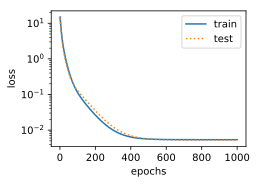

In [20]:
num_epochs = 1000

# Pick the first four dimensions, i.e. 1, x, x^2, x^3 from the polynomial features
fit_and_plot(
    poly_features[:n_train, 0:4], 
    poly_features[n_train:, 0:4], 
    labels[:n_train], 
    labels[n_train:]
)

- Linear Function Fitting (Underfitting)
  - After the decline in the early epoch, it's difficult to further decrease this model's training error rate.
  - After the last epoch iteration has been completed, the training error rate is still high.
  - When used in data sets generated by non-linear models, linear models are susceptible to underfitting.

final epoch: train loss 5.1508574 test loss 4.1340656
weight: [[3.404073  4.1500916]]


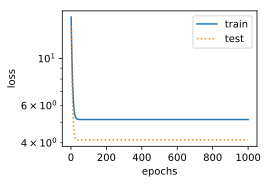

In [24]:
num_epochs = 1000

# Pick the first four dimensions, i.e. 1, x from the polynomial features
fit_and_plot(
    poly_features[:n_train, 0:2], 
    poly_features[n_train:, 0:2], 
    labels[:n_train], 
    labels[n_train:]
)

- Insufficient Training (Overfitting)
  - There is insufficient data to pin down the fact that all higher degree coefficients are close to zero.
  - ***A too complex model is easily influenced by noise in the training data***.
  - Even if the training error rate is low, the testing error data rate will still be high.

final epoch: train loss 0.011955421 test loss 0.021252891
weight: [[ 4.9227066   1.3885185  -2.9783912   4.874407   -1.0148908   1.3443892
  -0.26418862  0.12346248 -0.03515212 -0.04212591 -0.03587594 -0.03025109
  -0.03272099  0.00740935  0.04079974 -0.00665187  0.01734115 -0.00834598
  -0.00843566  0.0215878 ]]


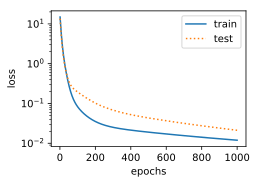

In [25]:
num_epochs = 1000
n_degree = 20 # degree of polynomials 

fit_and_plot(
    poly_features[:n_train, 0:n_degree], 
    poly_features[n_train:, 0:n_degree], 
    labels[:n_train], 
    labels[n_train:]
)

- Plot the training error vs. model complexity (degree of the polynomial) (3.11.6 Problems)

n_degree: 2 - final epoch: train loss 5.150863170623779, test loss 4.130029201507568
n_degree: 3 - final epoch: train loss 1.4600944519042969, test loss 1.9892637729644775
n_degree: 4 - final epoch: train loss 0.02632659114897251, test loss 0.035089656710624695
n_degree: 5 - final epoch: train loss 0.03756941854953766, test loss 0.14369729161262512
n_degree: 6 - final epoch: train loss 0.03391999006271362, test loss 0.09279215335845947
n_degree: 7 - final epoch: train loss 0.03659401088953018, test loss 0.1075616180896759
n_degree: 8 - final epoch: train loss 0.03495902940630913, test loss 0.09917280077934265
n_degree: 9 - final epoch: train loss 0.03554520383477211, test loss 0.10370409488677979
n_degree: 10 - final epoch: train loss 0.036453355103731155, test loss 0.10658491402864456
n_degree: 11 - final epoch: train loss 0.03632418066263199, test loss 0.10707336664199829
n_degree: 12 - final epoch: train loss 0.03484361991286278, test loss 0.10083470493555069
n_degree: 13 - final ep

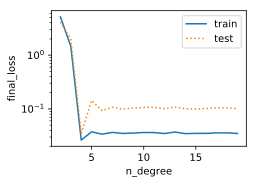

In [29]:
num_epochs, loss = 200, gloss.L2Loss()

def training_error_vs_model_complexity_and_plot():    
    max_degree = 20
    
    final_train_ls, final_test_ls = [], []
    
    for n_degree in range(2, max_degree):
        train_features = poly_features[:n_train, 0:n_degree]
        test_features = poly_features[n_train:, 0:n_degree]
        train_labels = labels[:n_train]
        test_labels = labels[n_train:]
        
        net = nn.Sequential()
        # Switch off the bias since we already catered for it in the polynomial features
        net.add(nn.Dense(units=1, use_bias=False))
        net.initialize()
    
        batch_size = min(10, train_labels.shape[0])
        train_iter = gdata.DataLoader(
            gdata.ArrayDataset(train_features, train_labels), 
            batch_size, 
            shuffle=True
        )
        trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

        for _ in range(num_epochs):
            for X, y in train_iter:
                with autograd.record():
                    l = loss(net(X), y)
                l.backward()
                trainer.step(batch_size)
                
        final_train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        final_test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
        
        print('n_degree: {0} - final epoch: train loss {1}, test loss {2}'.format(
            n_degree,
            final_train_ls[-1], 
            final_test_ls[-1]
        ))

    semilogy(
        range(2, max_degree), final_train_ls, 'n_degree', 'final_loss',
        range(2, max_degree), final_test_ls, ['train', 'test']
    )

training_error_vs_model_complexity_and_plot()

- - Plot the training error vs. amount of training data (3.11.6 Problems)

n_train: 100 - final epoch: train loss 0.02717152051627636, test loss 0.03628670051693916
n_train: 200 - final epoch: train loss 0.006055120378732681, test loss 0.00601654127240181
n_train: 300 - final epoch: train loss 0.005407609045505524, test loss 0.005017670337110758
n_train: 400 - final epoch: train loss 0.005107100121676922, test loss 0.005131487734615803
n_train: 500 - final epoch: train loss 0.005201703868806362, test loss 0.005071012303233147
n_train: 600 - final epoch: train loss 0.005225712899118662, test loss 0.005004637874662876
n_train: 700 - final epoch: train loss 0.005221483763307333, test loss 0.004918545018881559
n_train: 800 - final epoch: train loss 0.005199685227125883, test loss 0.004852724261581898
n_train: 900 - final epoch: train loss 0.005092345178127289, test loss 0.0051823826506733894
n_train: 1000 - final epoch: train loss 0.005067116115242243, test loss 0.005426034331321716


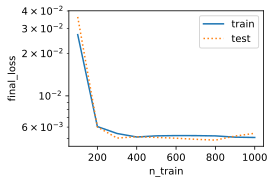

In [33]:
num_epochs, loss = 200, gloss.L2Loss()

def training_error_vs_amount_data_and_plot():    
    max_n_train = 1000
    
    final_train_ls, final_test_ls = [], []
    
    for n_train in range(100, max_n_train + 1, 100):
        train_features = poly_features[:n_train, 0:4]
        test_features = poly_features[n_train:, 0:4]
        train_labels = labels[:n_train]
        test_labels = labels[n_train:]
        
        net = nn.Sequential()
        # Switch off the bias since we already catered for it in the polynomial features
        net.add(nn.Dense(units=1, use_bias=False))
        net.initialize()
    
        batch_size = min(10, train_labels.shape[0])
        train_iter = gdata.DataLoader(
            gdata.ArrayDataset(train_features, train_labels), 
            batch_size, 
            shuffle=True
        )
        trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

        for _ in range(num_epochs):
            for X, y in train_iter:
                with autograd.record():
                    l = loss(net(X), y)
                l.backward()
                trainer.step(batch_size)
                
        final_train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        final_test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
        
        print('n_train: {0} - final epoch: train loss {1}, test loss {2}'.format(
            n_train,
            final_train_ls[-1], 
            final_test_ls[-1]
        ))

    semilogy(
        range(100, max_n_train + 1, 100), final_train_ls, 'n_train', 'final_loss',
        range(100, max_n_train + 1, 100), final_test_ls, ['train', 'test']
    )

training_error_vs_amount_data_and_plot()

# 3.12 Weight Decay
- Since obtaining additional training data is often costly, it is preferable to control the complexity of model.
- Instead of controlling all possible functions of model, we need a more fine-grained tool for adjusting model complexity.


## 3.12.1 Squared Norm Regularization
- ***Weight Decay***
  - It relies on the notion that among all functions $f$ the function $f = 0$ is the simplest of all.
    - We can measure functions by their proximity to zero. 
  - A linear function $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$ can be considered simple if its weight vector is small.
    - We can measure this via $|\mathbf{w}|^2$
  - One way of keeping the weight vector small is to add its value as a penalty to the problem of minimizing the loss. 
    - If the weight vector becomes too large, the learning algorithm will prioritize minimizing $\mathbf{w}$ over minimizing the training error.
  - Loss in Linear Regression $$l(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$
  - The new loss function which penalizes the size of the weight vector $$l(\mathbf{w}, b) + \frac{\lambda}{2} ||\mathbf{w}||^2$$
  where $\lambda$ is the regularization constant (hyperparameter). For $\lambda > 0$ we ensure that $\mathbf{w}$ cannot grow too large.
  - The stochastic gradient descent updates $$ \begin{aligned} \mathbf{w} & \leftarrow \mathbf{w} - \left(1- \eta\right)\frac{\lambda}{|\mathcal{B}|}  \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right), \end{aligned} $$
    - We also shrink the size of $\mathbf{w}$ towards 0, i.e. the weight ‘decays’

## 3.12.2 High-dimensional Linear Regression
- For high-dimensional regression it is difficult to pick the ‘right’dimensions to omit. --> Solution: weight decay
- Data Generation
$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, 0.01)$$
  - In order to observe overfitting more easily...
    - we pick a high-dimensional problem with d = 200 (n_degree)
    - a deliberatly low number of training examples, e.g. 20 (n_train)

In [36]:
%matplotlib inline
import gluonbook as gb
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

n_train, n_test, n_degree = 20, 100, 200
true_w, true_b = nd.ones((n_degree, 1)) * 0.01, 0.05

features = nd.random.normal(shape=(n_train + n_test, n_degree))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 3.12.3 Weight Decay from Scratch

- we simply add the $\ell_2$ penalty as an additional loss term after the target function.
  - the $\ell_p$ norm is defined as $$||\mathbf{x}||^p := \sum_{i=1}^d |x_i|^p$$

- Initialize model parameters
  - define a function that randomly initializes model parameters.
  - This function attaches a gradient to each parameter.

In [38]:
def init_params():
    w = nd.random.normal(scale=1, shape=(n_degree, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

- Define $\ell_2$ norm penalty

In [39]:
def l2_penalty(w):
    return (w**2).sum() / 2

- Define training and testing

In [40]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = gb.linreg, gb.squared_loss

train_iter = gdata.DataLoader(
    gdata.ArrayDataset(train_features, train_labels), 
    batch_size, 
    shuffle=True
)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added.
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            gb.sgd([w, b], lr, batch_size)
            
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().asscalar())
        
    gb.semilogy(
        range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
        range(1, num_epochs + 1), test_ls, ['train', 'test'])
    
    print('l2 norm of w:', w.norm().asscalar())

- Training without Regularization
  - When `lambd = 0` we do not use weight decay.
  - This is a perfect example of overfitting.

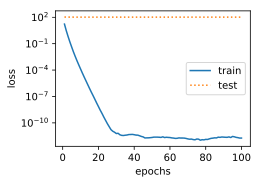

l2 norm of w: 12.976306


In [41]:
fit_and_plot(lambd=0)

- Using weight decay
  - Even though the training error increased, the error on the test set decreased.
  - Overfitting has been mitigated to some extent
  - The $\ell_2$ norm of the weight $\mathbf{w}$ is smaller than without using weight decay.

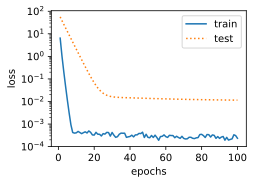

l2 norm of w: 0.034474522


In [42]:
fit_and_plot(lambd=3)

## 3.12.4 Weight Decay in Gluon
- Weight decay in Gluon is quite convenient (and also a bit special) and it is typically integrated with the optimization algorithm (Trainer)
- By default, Gluon decays weight and bias simultaneously.
- Note that we can have different optimizers for different sets of parameters. 
  - a Trainer with weight decay for weight
  - a Trainer without weight decay for bias

In [44]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    
    # The weight parameter has been decayed. Weight names generally end with "weight".
    trainer_w = gluon.Trainer(
        params=net.collect_params('.*weight'), 
        optimizer='sgd',
        optimizer_params={'learning_rate': lr, 'wd': wd}
    )
    
    # The bias parameter has not been decayed. Bias names generally end with "bias".
    trainer_b = gluon.Trainer(
        params=net.collect_params('.*bias'),
        optimizer='sgd',
        optimizer_params={'learning_rate': lr}
    )
    
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            
            # Call the step function on each of the two Trainer instances to update the weight and bias separately.
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
            
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
    gb.semilogy(
        range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
        range(1, num_epochs + 1), test_ls, ['train', 'test']
    )
    
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())

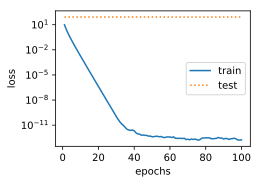

L2 norm of w: 13.644744


In [45]:
fit_and_plot_gluon(0)

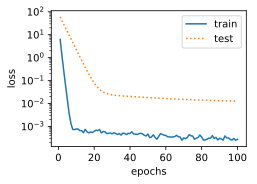

L2 norm of w: 0.03581347


In [46]:
fit_and_plot_gluon(3)

- For nonlinear functions, we simply sum over the weights for different layers, e.g. via $\sum_l |\mathbf{w}_l|^2$, which is equivalent to weight decay applied to all layers.
- In more intuitive terms, we can say that ***weight decay*** encourages the model to spread out its weights among many features

# 3.13 Dropout

## 3.13.1 Overfitting Revisited
- Linear Models
  - Given many more features than examples, linear models can overfit.
  - Linear models can't take into account nuanced (미모한) interactions between features.
  - Linear models have 
    - high bias: they can only represent a small class of functions
    - low variance: they give similar results across different random samples of the data
- Deep Neural Network Models
  - Neural networks are so flexible because they are not confined to looking at each feature individually. 
  - Instead, they can learn complex interactions among groups of features.

## 3.13.2 Robustness through Perturbations
- One way to overcome overfitting makes models ***simple***
- Yet another way to impose some notion of ***simplicity*** 
  - <u>the function should be robust under modest changes in the input</u>
  - Simple function resilient to perturbations in the input.
- Simply add some noise $\epsilon \sim \mathcal{N}(0,\sigma^2)$ to inputs $\mathbf{x}$ and use this data during training via $\mathbf{x}' = \mathbf{x} + \epsilon$. 
  - A key property is that in expectation $\mathbf{E}[\mathbf{x}'] = \mathbf{x}$.
- For intermediate layers, though, this might not be quite so desirable since the scale of the noise might not be appropriate. 
- The alternative is to ***perturb the activation function*** $h$ as follows: $$ \begin{aligned} h' = \begin{cases} 0 & \text{ with probability } p \\ \frac{h}{1-p} & \text{ otherwise} \end{cases} \end{aligned} $$
  - the expectation remains unchanged, i.e. $\mathbf{E}[h'] = h$.
  - intermediate activations $h$ are replaced by a random variable $h′$ with matching expectation.
- The name‘dropout’ arises from the notion that some neurons ‘drop out’ of the computation for the purpose of computing the final result. 

## 3.13.3 Dropout in Practice
- Recall the multilayer perceptron $$ \begin{aligned} h & = \sigma(W_1 x + b_1) \\ o & = W_2 h + b_2 \\ \hat{y} & = \mathrm{softmax}(o) \end{aligned} $$
- When we apply dropout to the hidden layer, it amounts to removing hidden units with probability $p$
  - their output is set to 0 with the probability $p$.
  ![](https://github.com/diveintodeeplearning/d2l-en/raw/master/img/dropout2.svg?sanitize=true)
- The calculation of $y$ no longer depends on $h_2$ and $h_5$
  - their respective gradient also vanishes when performing backprop.
- This is exactly what we want for ***regularization*** purposes to cope with overfitting. 
- <u>At test time, we typically do not use dropout to obtain more conclusive results.</u>


## 3.13.4 Dropout from Scratch

In [47]:
import gluonbook as gb
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import loss as gloss, nn

def dropout(X, drop_prob):
    assert 0 <= drop_prob <= 1
    # In this case, all elements are dropped out.
    if drop_prob == 1:
        return X.zeros_like()
    mask = nd.random.uniform(0, 1, X.shape) > drop_prob
    return mask * X / (1.0-drop_prob)

In [48]:
X = nd.arange(16).reshape((2, 8))
print(dropout(X, 0))
print(dropout(X, 0.5))
print(dropout(X, 1))


[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]]
<NDArray 2x8 @cpu(0)>

[[ 0.  0.  4.  6.  0. 10.  0. 14.]
 [16. 18.  0. 22. 24.  0.  0. 30.]]
<NDArray 2x8 @cpu(0)>

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
<NDArray 2x8 @cpu(0)>


- Defining Model Parameters
  - MLP with two hidden layers. 
    - The two hidden layers both have 256 outputs.

In [49]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens1))
b1 = nd.zeros(num_hiddens1)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens1, num_hiddens2))
b2 = nd.zeros(num_hiddens2)
W3 = nd.random.normal(scale=0.01, shape=(num_hiddens2, num_outputs))
b3 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2, W3, b3]
for param in params:
    param.attach_grad()

- Define the Model
  - It is generally recommended to set a lower dropout probability closer to the input layer. 
    - For the first hidden layer: 0.2
    - For the second hidden layer: 0.5
  - By using the `autograd.is_training()` function, we can ensure that dropout is only active during training.

In [51]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = (nd.dot(X, W1) + b1).relu()
    
    if autograd.is_training():        # Use dropout only when training the model.
        H1 = dropout(H1, drop_prob1)  # Add a dropout layer after the first fully connected layer.

    H2 = (nd.dot(H1, W2) + b2).relu()

    if autograd.is_training():
        H2 = dropout(H2, drop_prob2)  # Add a dropout layer after the second fully connected layer.

    return nd.dot(H2, W3) + b3

- Training and Testing

In [52]:
num_epochs, lr, batch_size = 10, 0.5, 256

loss = gloss.SoftmaxCrossEntropyLoss()

train_iter, test_iter = gb.load_data_fashion_mnist(batch_size)

gb.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 1.1481, train acc 0.553, test acc 0.775
epoch 2, loss 0.5930, train acc 0.779, test acc 0.822
epoch 3, loss 0.4910, train acc 0.819, test acc 0.851
epoch 4, loss 0.4494, train acc 0.835, test acc 0.858
epoch 5, loss 0.4231, train acc 0.846, test acc 0.856
epoch 6, loss 0.3975, train acc 0.854, test acc 0.864
epoch 7, loss 0.3810, train acc 0.860, test acc 0.874
epoch 8, loss 0.3661, train acc 0.865, test acc 0.871
epoch 9, loss 0.3555, train acc 0.871, test acc 0.880
epoch 10, loss 0.3462, train acc 0.873, test acc 0.882


## 3.13.5 Dropout in Gluon
- In Gluon, just add the `Dropout` layer after the fully connected layer and specify the dropout probability.
- `Dropout` layer will randomly drop out the output elements of the previous layer at the specified dropout probability
- `Dropout` layer simply passes the data through during test.

In [53]:
net = nn.Sequential()

net.add(
    nn.Dense(256, activation="relu"),
    nn.Dropout(drop_prob1),  # Add a dropout layer after the first fully connected layer.
    nn.Dense(256, activation="relu"),
    nn.Dropout(drop_prob2),  # Add a dropout layer after the second fully connected layer.
    nn.Dense(10)
)

net.initialize(init.Normal(sigma=0.01))

In [54]:
num_epochs, lr, batch_size = 10, 0.5, 256

train_iter, test_iter = gb.load_data_fashion_mnist(batch_size)

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

gb.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 1.1681, train acc 0.551, test acc 0.795
epoch 2, loss 0.5893, train acc 0.782, test acc 0.825
epoch 3, loss 0.4937, train acc 0.819, test acc 0.854
epoch 4, loss 0.4530, train acc 0.835, test acc 0.857
epoch 5, loss 0.4243, train acc 0.845, test acc 0.858
epoch 6, loss 0.4061, train acc 0.851, test acc 0.866
epoch 7, loss 0.3837, train acc 0.861, test acc 0.872
epoch 8, loss 0.3717, train acc 0.864, test acc 0.873
epoch 9, loss 0.3602, train acc 0.869, test acc 0.878
epoch 10, loss 0.3517, train acc 0.871, test acc 0.874
